In [ ]:
import numpy as np
import pandas as pd
#from google.colab import files
#uploaded = files.upload()
df = pd.read_csv("car data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   company        301 non-null    object 
 2   Year           301 non-null    int64  
 3   Selling_Price  301 non-null    float64
 4   Present_Price  301 non-null    float64
 5   Kms_Driven     301 non-null    int64  
 6   Fuel_Type      301 non-null    object 
 7   Seller_Type    301 non-null    object 
 8   Transmission   301 non-null    object 
 9   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 23.6+ KB


In [ ]:
df.isnull().sum()

Car_Name         0
company          0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
print(df.Fuel_Type.value_counts())
print(df.Seller_Type.value_counts())
print(df.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


In [ ]:
df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [ ]:
df.head()

,Car_Name,company,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,maruti suzuki,2014,3.35,5.59,27000,0,0,0,0
1,sx4,maruti suzuki,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,maruti suzuki,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,maruti suzuki,2011,2.85,4.15,5200,0,0,0,0
4,swift,maruti suzuki,2014,4.60,6.87,42450,1,0,0,0


In [ ]:
X = df.drop(['Car_Name','Selling_Price','company'],axis=1)
Y = df['Selling_Price']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.1,random_state=2)

In [ ]:
lin_reg_model = LinearRegression()

In [ ]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

LinearRegression()

In [ ]:
triaing_data_prediction = lin_reg_model.predict(X_train)

In [ ]:
from sklearn import metrics
error_score = metrics.r2_score(Y_train,triaing_data_prediction)
print("R squared Error : ",error_score)

R squared Error :  0.8799451660493711


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


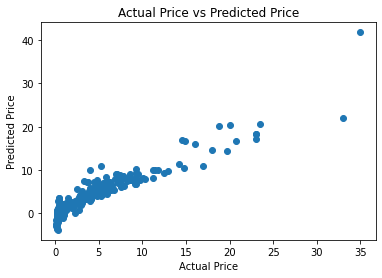

In [ ]:
training_data_prediction=lin_reg_model.predict(X_train.values)
plt.scatter(Y_train,training_data_prediction)

plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [ ]:
test_pred=lin_reg_model.predict(X_test)

In [ ]:
error_score=metrics.r2_score(Y_test, test_pred)
print("R squared error", error_score)

R squared error 0.8365766715027051


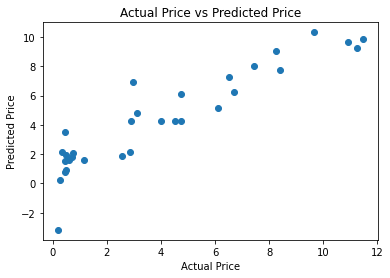

In [ ]:
plt.scatter(Y_test, test_pred)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()